In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

 SETTING UP THE FIRST DATASET



In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data_Science/PRML Assignment 1/Dataset_1_Team_1.csv')

In [ ]:
df.shape

(4500, 3)

In [ ]:
df.head()

,# x_1,x_2,Class_label
0,33.715578,-115.229932,0
1,28.073168,-162.214820,0
2,33.106467,101.944282,1
3,-5.355554,-175.772981,2
4,33.147877,97.486595,1


In [ ]:
df = df.rename( columns = {"# x_1": "x1","x_2":"x2", "Class_label": "Labels"})
df.head()

,x1,x2,Labels
0,33.715578,-115.229932,0
1,28.073168,-162.214820,0
2,33.106467,101.944282,1
3,-5.355554,-175.772981,2
4,33.147877,97.486595,1


CELL HAVING HELPFUL FUNCTIONS


In [ ]:
# For finding priors 

def find_prior(data,col_name):

  Priors = data[col_name].value_counts()/len(data)
  return Priors

# Calculates the gaussian probabiltity density function

class MyClass:

  def __init__(self,p=0,MU=np.zeros((2,1)),Cov = np.zeros((2,2))): # defines a gaussian class conditional with a mean and covariance matrix

    self.prob = p
    self.mean = MU
    self.cov_matrix = Cov

  def posterior(self,X):      # Calculates posterior probability given an input vector and class

    if X.shape != (2,1):

      print('Shape of input is invalid!!')

    else:


      p = self.prob
      Mu = self.mean
      Cov = self.cov_matrix
      InvCov = np.linalg.inv(Cov)
      DetCov = abs(np.linalg.det(Cov))

      X_mean = np.subtract(X,Mu)
      X_meanT = np.transpose(X_mean)

      Y = np.dot(X_meanT,InvCov)
      Z = np.dot(Y,X_mean)

      
      return p/math.sqrt(2*math.pi*DetCov)*math.exp(-Z/2)

def Risk(X,L,n):

  X = X.reshape(2,1)
  u = [class_0.posterior(X),class_1.posterior(X),class_2.posterior(X)]
  v = L[n][:]
  
  return np.dot(u,v) 

def Risk_D2(X,L,n):

  X = X.reshape(2,1)
  u = [class2_0.posterior(X),class2_1.posterior(X),class2_2.posterior(X)]
  v = L[n][:]
  
  return np.dot(u,v)



"""
def plot_decision_boundary(self):
  X_set, y_set = self.X_test, self.y_test
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
  plt.contourf(X1, X2, self.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('orange', 'green', "blue")))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', "blue"))(i), label = j,marker='.')
  plt.title('Naive Bayes Classification our implementation(Test set)')
  plt.xlabel('X_1')
  plt.ylabel('X_2')
  plt.legend()
  plt.show()

  """


'\ndef plot_decision_boundary(self):\n  X_set, y_set = self.X_test, self.y_test\n  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),\n                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))\n  plt.contourf(X1, X2, self.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap((\'orange\', \'green\', "blue")))\n  plt.xlim(X1.min(), X1.max())\n  plt.ylim(X2.min(), X2.max())\n  for i, j in enumerate(np.unique(y_set)):\n      plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap((\'red\', \'green\', "blue"))(i), label = j,marker=\'.\')\n  plt.title(\'Naive Bayes Classification our implementation(Test set)\')\n  plt.xlabel(\'X_1\')\n  plt.ylabel(\'X_2\')\n  plt.legend()\n  plt.show()\n\n  '

CALCULATIONS AND PROCEDURE


In [ ]:
# Splitting the data 

train, test = train_test_split(df,test_size = 0.2, random_state =42)
print(train.shape,test.shape)

(3600, 3) (900, 3)


In [ ]:
# calculate priors of all classes

Priors = find_prior(train,'Labels')
print(Priors)

class_0 = MyClass()
class_1 = MyClass()
class_2 = MyClass()
 

class_0.prob = Priors[0]
class_1.prob = Priors[1]
class_2.prob = Priors[2]

print(Priors[0])

1    0.339167
0    0.330833
2    0.330000
Name: Labels, dtype: float64
0.3308333333333333


In [ ]:
# Learning from train data
# Learning is equivalent to finding ML estimate MU since covariance is already given and we dont need to estimate it

# For Class 0

c0 = train[train['Labels']==0]
c0 = c0.drop(columns=['Labels'])
class_0.mean = (np.array(c0.mean())).reshape(2,1)
print(class_0.mean)

# For Class 1

c1 = train[train['Labels']==1]
c1 = c1.drop(columns=['Labels'])
class_1.mean = (np.array(c1.mean())).reshape(2,1)
print(class_1.mean)

# For Class 2

c2 = train[train['Labels']==2]
c2 = c2.drop(columns=['Labels'])
class_2.mean = (np.array(c2.mean())).reshape(2,1)
print(class_2.mean)

[[  33.34681715]
 [-158.50857774]]
[[33.40005486]
 [94.92507475]]
[[  -4.45194525]
 [-156.59172162]]


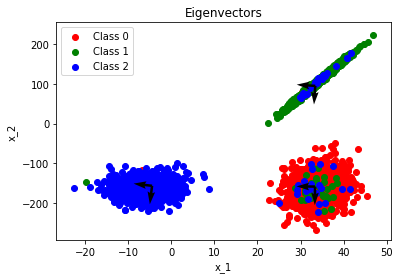

In [ ]:
# plotting to get a better idea of how classes work
plt.figure()
ax = plt.axes()

plt.xlabel('x_1')
plt.ylabel('x_2')

x0 = np.array(c0['x1'])
y0 = np.array(c0['x2'])
p_0 = np.array(c0.mean())

x1 = np.array(c1['x1'])
y1 = np.array(c1['x2'])
p_1 = np.array(c1.mean())

x2 = np.array(c2['x1'])
y2 = np.array(c2['x2'])
p_2 = np.array(c2.mean())



ax.scatter(x0,y0,marker = 'o',c='r',label ='Class 0')
ax.scatter(x1,y1,marker = 'o',c='g',label ='Class 1')
ax.scatter(x2,y2,marker = 'o',c='b',label ='Class 2')
ax.legend()
plt.title('Eigenvectors')

cov_list = [np.cov(c0,rowvar=False),np.cov(c1,rowvar=False),np.cov(c2,rowvar=False)]
points = [p_0,p_1,p_2]


for i, cov in enumerate(cov_list):

  point = points[i]
  w, v = np.linalg.eig(cov)
  
  plt.quiver(*point,*v[:,0],color=['k'])
  plt.quiver(*point,*v[:,1],color=['k'])

In [ ]:
# Case (a)
# Cov = I  for all classes

Cov_I = np.array([[1,0],[0,1]])

def model_1(data,mat_0,mat_1,mat_2):

  L = np.array([[0,2,1],[2,0,3],[1,3,0]])

  class_0.cov_matrix = mat_0
  class_1.cov_matrix = mat_1
  class_2.cov_matrix = mat_2

  class_group = [class_0,class_1,class_2]

  class_labels = []

  for index, row in data.iterrows():

    X = np.array([[row['x1']],[row['x2']]])

    risks = [ Risk(X,L,0), Risk(X,L,1), Risk(X,L,2) ]

    class_labels.append(risks.index(min(risks))) 

  class_labels = pd.Series(class_labels)
  
  return class_labels

output_labels1_train = model_1(train,Cov_I,Cov_I,Cov_I)
output_labels1_test  = model_1(test,Cov_I,Cov_I,Cov_I)

In [ ]:
# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train['Labels'],output_labels1_train),'\n',
      'Test Accuracy : ',accuracy_score(test['Labels'],output_labels1_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test['Labels'],output_labels1_test,normalize='true'))


print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train['Labels'],output_labels1_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test['Labels'],output_labels1_test)


)


Train Accuracy :  0.8688888888888889 
 Test Accuracy :  0.8711111111111111 
 Confusion matrix : 
 [[0.95932203 0.02033898 0.02033898]
 [0.25773196 0.73539519 0.00687285]
 [0.07006369 0.01592357 0.91401274]]



Mean Square Error on training data :  0.2127777777777778 
 Mean Square Error on testing :  0.2222222222222222


In [ ]:
"""
# Plotting the classes and decision boundary

X_set = np.array(train.drop(columns=['Labels']))
y_set = np.array(train['Labels'])

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5),)

Z = (np.transpose(np.array([np.ravel(X1),np.ravel(X2)])).reshape(X1.shape)

print(Z.shape)
Z = model_1(Z,Cov_I,Cov_I,Cov_I)
print(Z.shape)

plt.contourf(X1, X2, Z,alpha = 0.75, cmap = ListedColormap(('orange', 'green', "blue")))
"""

'\n# Plotting the classes and decision boundary\n\nX_set = np.array(train.drop(columns=[\'Labels\']))\ny_set = np.array(train[\'Labels\'])\n\nX1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),\n                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5),)\n\nZ = (np.transpose(np.array([np.ravel(X1),np.ravel(X2)])).reshape(X1.shape)\n\nprint(Z.shape)\nZ = model_1(Z,Cov_I,Cov_I,Cov_I)\nprint(Z.shape)\n\nplt.contourf(X1, X2, Z,alpha = 0.75, cmap = ListedColormap((\'orange\', \'green\', "blue")))\n'

In [ ]:
# Case (b)
# Cov is same  for all classes
# We take the whole dataset into account irrespective of the classes to calculate the covariance matrix
# We only consider the variance of respective elements since Naive-bayes demands conditional independence which means uncorrelated in case of Gaussian
# So cross-terms in the matrix have to be zero

X_input = np.array(train.drop(columns=['Labels']))

Cov_same = np.cov(X_input,rowvar= False)
Cov_same_diag = np.diag(np.diag(Cov_same))

def model_2(data,mat_0,mat_1,mat_2): 

  L = np.array([[0,2,1],[2,0,3],[1,3,0]])

  class_0.cov_matrix = mat_0
  class_1.cov_matrix = mat_1
  class_2.cov_matrix = mat_2

  class_group = [class_0,class_1,class_2]

  class_labels = []

  for index, row in data.iterrows():

    X = np.array([[row['x1']],[row['x2']]])

    risks = [ Risk(X,L,0), Risk(X,L,1), Risk(X,L,2) ]

    class_labels.append(risks.index(min(risks))) 

  class_labels = pd.Series(class_labels)
  
  return class_labels

output_labels2_train = model_2(train,Cov_same_diag,Cov_same_diag,Cov_same_diag)
output_labels2_test  = model_2(test,Cov_same_diag,Cov_same_diag,Cov_same_diag)

In [ ]:
# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train['Labels'],output_labels2_train),'\n',
      'Test Accuracy : ',accuracy_score(test['Labels'],output_labels2_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test['Labels'],output_labels2_test,normalize='true'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train['Labels'],output_labels2_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test['Labels'],output_labels2_test)


)


Train Accuracy :  0.9652777777777778 
 Test Accuracy :  0.9677777777777777 
 Confusion matrix : 
 [[0.9559322  0.02372881 0.02033898]
 [0.0137457  0.97594502 0.01030928]
 [0.00955414 0.01910828 0.97133758]]



Mean Square Error on training data :  0.06888888888888889 
 Mean Square Error on testing :  0.06222222222222222


In [ ]:
# Case (c) 
# Covariance different for all classes
# We only consider the variance of respective elements since Naive-bayes demands conditional independence which means uncorrelated in case of Gaussian
# So cross-terms in the matrix have to be zero
m0 = np.diag(np.diag(np.cov(c0, rowvar=False)))
m1 = np.diag(np.diag(np.cov(c1,rowvar=False)))
m2 = np.diag(np.diag(np.cov(c2,rowvar=False)))

def model_3(data,mat_0,mat_1,mat_2): 

  L = np.array([[0,2,1],[2,0,3],[1,3,0]])

  class_0.cov_matrix = mat_0
  class_1.cov_matrix = mat_1
  class_2.cov_matrix = mat_2 

  class_group = [class_0,class_1,class_2]

  class_labels = []

  for index, row in data.iterrows():

    X = np.array([[row['x1']],[row['x2']]])

    risks = [ Risk(X,L,0), Risk(X,L,1), Risk(X,L,2) ]

    class_labels.append(risks.index(min(risks))) 

  class_labels = pd.Series(class_labels)
  
  return class_labels

output_labels3_train = model_3(train,m0,m1,m2)
output_labels3_test  = model_3(test,m0,m1,m2)


Train Accuracy :  0.965 
 Test Accuracy :  0.9677777777777777 
 Confusion matrix : 
 [[0.31333333 0.00777778 0.00666667]
 [0.00444444 0.31555556 0.00333333]
 [0.00333333 0.00666667 0.33888889]]



Mean Square Error on training data :  0.06916666666666667 
 Mean Square Error on testing :  0.06222222222222222


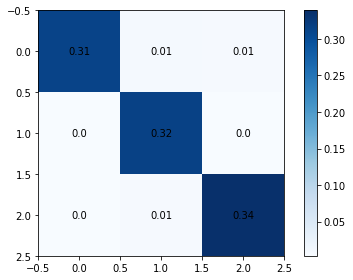

In [ ]:
# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train['Labels'],output_labels3_train),'\n',
      'Test Accuracy : ',accuracy_score(test['Labels'],output_labels3_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test['Labels'],output_labels3_test,normalize='all'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train['Labels'],output_labels3_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test['Labels'],output_labels3_test)


)


x=confusion_matrix(test['Labels'],output_labels3_test,normalize='all')
plt.imshow(x,cmap=plt.cm.Blues,)
plt.colorbar()



for i in range(x.shape[0]):
    for j in range(x.shape[1]):

        w = round(float(format(x[i, j])),2)

        plt.text(j, i,w,ha="center", va="center") 

plt.tight_layout()



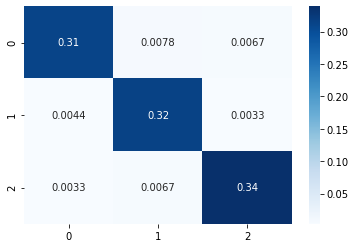

In [ ]:
cm = pd.DataFrame(x,columns=['0','1','2'])
plt.figure()
sns.heatmap(cm,annot=True,cmap='Blues')


In [ ]:
# Case (d)
# Cov is same  for all classes
# We take the whole dataset into account irrespective of the classes to calculate the covariance matrix
# Cross-terms need not be zero

X_input = np.array(train.drop(columns=['Labels']))
Cov_same = np.cov(X_input,rowvar= False)

def model_4(data,mat_0,mat_1,mat_2): 

  L = np.array([[0,2,1],[2,0,3],[1,3,0]])

  class_0.cov_matrix = mat_0
  class_1.cov_matrix = mat_1
  class_2.cov_matrix = mat_2

  class_group = [class_0,class_1,class_2]

  class_labels = []

  for index, row in data.iterrows():

    X = np.array([[row['x1']],[row['x2']]])

    risks = [ Risk(X,L,0), Risk(X,L,1), Risk(X,L,2) ]

    class_labels.append(risks.index(min(risks))) 

  class_labels = pd.Series(class_labels)
  
  return class_labels

output_labels4_train = model_4(train,Cov_same,Cov_same,Cov_same)
output_labels4_test  = model_4(test,Cov_same,Cov_same,Cov_same)

In [ ]:
# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train['Labels'],output_labels4_train),'\n',
      'Test Accuracy : ',accuracy_score(test['Labels'],output_labels4_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test['Labels'],output_labels4_test,normalize='all'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train['Labels'],output_labels4_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test['Labels'],output_labels4_test)


)



Train Accuracy :  0.9652777777777778 
 Test Accuracy :  0.9677777777777777 
 Confusion matrix : 
 [[0.31333333 0.00777778 0.00666667]
 [0.00444444 0.31555556 0.00333333]
 [0.00333333 0.00666667 0.33888889]]



Mean Square Error on training data :  0.06888888888888889 
 Mean Square Error on testing :  0.06222222222222222


In [ ]:
# Case (e) 
# Covariance different for all classes
# No conditional independence so cross-terms need not be zero
M0 = np.cov(c0, rowvar=False)
M1 = np.cov(c1,rowvar=False)
M2 = np.cov(c2,rowvar=False)


def model_5(data,mat_0,mat_1,mat_2): 

  L = np.array([[0,2,1],[2,0,3],[1,3,0]])

  
  class_0.cov_matrix = mat_0
  class_1.cov_matrix = mat_1
  class_2.cov_matrix = mat_2

  class_group = [class_0,class_1,class_2]

  class_labels = []

  for index, row in data.iterrows():

    X = np.array([[row['x1']],[row['x2']]])

    risks = [ Risk(X,L,0), Risk(X,L,1), Risk(X,L,2) ]

    class_labels.append(risks.index(min(risks))) 

  class_labels = pd.Series(class_labels)
  
  return class_labels

output_labels5_train = model_5(train,M0,M1,M2)
output_labels5_test = model_5(test,M0,M1,M2)


In [ ]:
# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train['Labels'],output_labels5_train),'\n',
      'Test Accuracy : ',accuracy_score(test['Labels'],output_labels5_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test['Labels'],output_labels5_test,normalize='true'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train['Labels'],output_labels5_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test['Labels'],output_labels5_test)


)

w , v = np.linalg.eig(Cov_same)

print(w,'\n',v.T)

Train Accuracy :  0.9652777777777778 
 Test Accuracy :  0.9677777777777777 
 Confusion matrix : 
 [[0.9559322  0.02372881 0.02033898]
 [0.0137457  0.97594502 0.01030928]
 [0.00955414 0.01910828 0.97133758]]



Mean Square Error on training data :  0.06888888888888889 
 Mean Square Error on testing :  0.06222222222222222
[  274.33166841 16808.37932861] 
 [[-0.99725608  0.07402906]
 [-0.07402906 -0.99725608]]


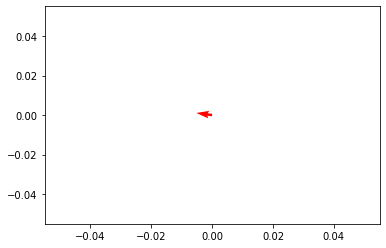

In [ ]:
plt.figure()




In [ ]:
X1 = np.linspace(train['x1'].min()-1,train['x1'].max()+1,200)
X2 = np.linspace(-300,250,200)

X_1, X_2 = np.meshgrid(X1,X2)

Z = np.array([X_1.ravel(),X_2.ravel()]).T
Z_df = pd.DataFrame(Z,columns=['x1','x2'])

plot_out = model_5(Z_df,M0,M1,M2)
plot_out.shape



(40000,)

In [ ]:
X_set = train[['x1','x2']]
y_set = train['Labels']

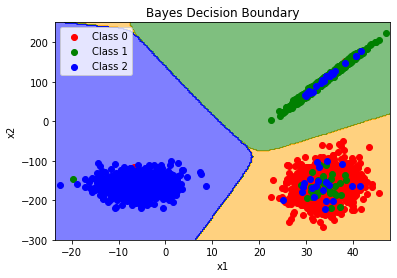

In [ ]:
plt.figure()
ax1 = plt.axes()
plot_out = np.array(plot_out).reshape(len(X1),len(X2))
plt.contourf(X_1,X_2,plot_out,alpha=0.5, cmap = ListedColormap(('orange', 'green', "blue")))

ax1.scatter(x0,y0,marker = 'o',c='r',label ='Class 0')
ax1.scatter(x1,y1,marker = 'o',c='g',label ='Class 1')
ax1.scatter(x2,y2,marker = 'o',c='b',label ='Class 2')

plt.title('Bayes Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

SETTING UP THE SECOND DATASET

In [ ]:
data2 = pd.read_csv('/content/drive/My Drive/Data_Science/PRML Assignment 1/Dataset_2_Team_1.csv')

In [ ]:
data2.shape

(4500, 3)

In [ ]:
data2.head()

,# x_1,x_2,Class_label
0,10.708615,-95.618619,1
1,33.036225,-161.982595,1
2,7.621840,-56.974110,2
3,13.203861,-129.540869,1
4,18.077857,-82.141944,1


In [ ]:
data2 = data2.rename( columns = {"# x_1": "x1","x_2":"x2", "Class_label": "Labels"})
data2.head()

,x1,x2,Labels
0,10.708615,-95.618619,1
1,33.036225,-161.982595,1
2,7.621840,-56.974110,2
3,13.203861,-129.540869,1
4,18.077857,-82.141944,1


In [ ]:
data2['Labels'].unique()

array([1, 2, 0])

In [ ]:
# Splitting the data 

train2, test2 = train_test_split(data2,test_size = 0.2, random_state =42)
print(train2.shape,test2.shape)

(3600, 3) (900, 3)


In [ ]:
# calculate priors of all classes

Priors = find_prior(train2,'Labels')
print(Priors)

class2_0 = MyClass()
class2_1 = MyClass()
class2_2 = MyClass()
 

class2_0.prob = Priors[0]
class2_1.prob = Priors[1]
class2_2.prob = Priors[2] 

0    0.340278
2    0.330556
1    0.329167
Name: Labels, dtype: float64


In [ ]:
# Learning from train data
# Learning is equivalent to finding ML estimate MU since covariance is already given and we dont need to estimate it

# For Class 0

d0 = train2[train2['Labels']==0]
d0 = d0.drop(columns=['Labels'])
class2_0.mean = (np.array(d0.mean())).reshape(2,1)
print(class2_0.mean)

# For Class 1

d1 = train2[train2['Labels']==1]
d1 = d1.drop(columns=['Labels'])
class2_1.mean = (np.array(d1.mean())).reshape(2,1)
print(class2_1.mean)

# For Class 2

d2 = train2[train2['Labels']==2]
d2 = d2.drop(columns=['Labels'])
class2_2.mean = (np.array(d2.mean())).reshape(2,1)
print(class2_2.mean)

[[ -22.66534799]
 [-121.6755456 ]]
[[  23.1353805 ]
 [-120.56786659]]
[[23.10907879]
 [-0.26185485]]


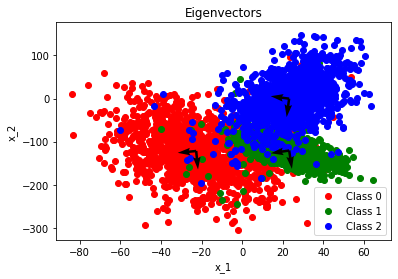

In [ ]:
# plotting to get a better idea of how classes look

ax = plt.axes()

X20 = np.array(d0['x1'])
Y20 = np.array(d0['x2'])

X21 = np.array(d1['x1'])
Y21 = np.array(d1['x2'])

X22 = np.array(d2['x1'])
Y22 = np.array(d2['x2'])

ax.scatter(X20,Y20,marker = 'o',c='r',label ='Class 0')
ax.scatter(X21,Y21,marker = 'o',c='g', label = 'Class 1')
ax.scatter(X22,Y22,marker = 'o',c='b',label = 'Class 2')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()

p_0 = np.array(d0.mean())
p_1 = np.array(d1.mean())
p_2 = np.array(d2.mean())

cov_list = [np.cov(d0,rowvar=False),np.cov(d1,rowvar=False),np.cov(d2,rowvar=False)]
points = [p_0,p_1,p_2]


for i, cov in enumerate(cov_list):

  point = points[i]
  w, v = np.linalg.eig(cov)
  
  plt.quiver(*point,*v[:,0],color=['k'])
  plt.quiver(*point,*v[:,1],color=['k'])

  plt.title('Eigenvectors')

In [ ]:
# Model to calculate for 2nd dataset

def model_D2(data,mat_0,mat_1,mat_2): 

  L = np.array([[0,2,1],[2,0,3],[1,3,0]])

  
  class2_0.cov_matrix = mat_0
  class2_1.cov_matrix = mat_1
  class2_2.cov_matrix = mat_2

  class_group = [class2_0,class2_1,class2_2]

  class_labels = []

  for index, row in data.iterrows():

    X = np.array([[row['x1']],[row['x2']]])

    risks = [ Risk_D2(X,L,0), Risk_D2(X,L,1), Risk_D2(X,L,2) ]

    class_labels.append(risks.index(min(risks))) 

  class_labels = pd.Series(class_labels)
  
  return class_labels

In [ ]:
# Case (a)
# Covariance = I

output_D2_1_train = model_D2(train2,Cov_I,Cov_I,Cov_I)
output_D2_1_test  = model_D2(test2,Cov_I,Cov_I,Cov_I)

# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train2['Labels'],output_D2_1_train),'\n',
      'Test Accuracy : ',accuracy_score(test2['Labels'],output_D2_1_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test2['Labels'],output_D2_1_test,normalize='true'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train2['Labels'],output_D2_1_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test2['Labels'],output_D2_1_test)


)

Train Accuracy :  0.7783333333333333 
 Test Accuracy :  0.7822222222222223 
 Confusion matrix : 
 [[0.93197279 0.06462585 0.00340136]
 [0.12111801 0.86335404 0.01552795]
 [0.41901408 0.04577465 0.53521127]]



Mean Square Error on training data :  0.6575 
 Mean Square Error on testing :  0.6177777777777778


In [ ]:
# Case (b)

X_input_D2 = np.array(train2.drop(columns=['Labels']))

Cov_same_2 = np.cov(X_input_D2,rowvar= False)
Cov_same_2_diag = np.diag(np.diag(Cov_same_2))

output_D2_2_train = model_D2(train2,Cov_same_2_diag,Cov_same_2_diag,Cov_same_2_diag)
output_D2_2_test  = model_D2(test2,Cov_same_2_diag,Cov_same_2_diag,Cov_same_2_diag)

# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train2['Labels'],output_D2_2_train),'\n',
      'Test Accuracy : ',accuracy_score(test2['Labels'],output_D2_2_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test2['Labels'],output_D2_2_test,normalize='true'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train2['Labels'],output_D2_2_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test2['Labels'],output_D2_2_test)


)

Train Accuracy :  0.8586111111111111 
 Test Accuracy :  0.8588888888888889 
 Confusion matrix : 
 [[0.88435374 0.10544218 0.01020408]
 [0.08695652 0.88819876 0.02484472]
 [0.16901408 0.03169014 0.79929577]]



Mean Square Error on training data :  0.30722222222222223 
 Mean Square Error on testing :  0.3111111111111111


In [ ]:
# Case (c)

m0_D2 = np.diag(np.diag(np.cov(d0, rowvar=False)))
m1_D2 = np.diag(np.diag(np.cov(d1,rowvar=False)))
m2_D2 = np.diag(np.diag(np.cov(d2,rowvar=False)))

output_D2_3_train = model_D2(train2,m0_D2,m1_D2,m2_D2)
output_D2_3_test  = model_D2(test2,m0_D2,m1_D2,m2_D2)

# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train2['Labels'],output_D2_3_train),'\n',
      'Test Accuracy : ',accuracy_score(test2['Labels'],output_D2_3_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test2['Labels'],output_D2_3_test,normalize='true'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train2['Labels'],output_D2_3_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test2['Labels'],output_D2_3_test)


)

Train Accuracy :  0.9069444444444444 
 Test Accuracy :  0.9088888888888889 
 Confusion matrix : 
 [[0.91496599 0.07142857 0.01360544]
 [0.02795031 0.94720497 0.02484472]
 [0.08802817 0.0528169  0.85915493]]



Mean Square Error on training data :  0.17305555555555555 
 Mean Square Error on testing :  0.18777777777777777


In [ ]:
# Case (d)
X_input_D2 = np.array(train2.drop(columns=['Labels']))
Cov_same_D2 = np.cov(X_input_D2,rowvar= False)


output_D2_4_train = model_D2(train2,Cov_same_D2,Cov_same_D2,Cov_same_D2)
output_D2_4_test  = model_D2(test2,Cov_same_D2,Cov_same_D2,Cov_same_D2)

# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train2['Labels'],output_D2_4_train),'\n',
      'Test Accuracy : ',accuracy_score(test2['Labels'],output_D2_4_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test2['Labels'],output_D2_4_test,normalize='true'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train2['Labels'],output_D2_4_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test2['Labels'],output_D2_4_test)


)

Train Accuracy :  0.8377777777777777 
 Test Accuracy :  0.8288888888888889 
 Confusion matrix : 
 [[0.83333333 0.15646259 0.01020408]
 [0.11490683 0.86024845 0.02484472]
 [0.16549296 0.04577465 0.78873239]]



Mean Square Error on training data :  0.33305555555555555 
 Mean Square Error on testing :  0.3377777777777778


In [ ]:
# Case (e)
M0_D2 = np.cov(d0, rowvar=False)
M1_D2 = np.cov(d1,rowvar=False)
M2_D2 = np.cov(d2,rowvar=False)

output_D2_5_train = model_D2(train2,M0_D2,M1_D2,M2_D2)
output_D2_5_test  = model_D2(test2,M0_D2,M1_D2,M2_D2)

# Listing out the performance metrics

print('Train Accuracy : ',accuracy_score(train2['Labels'],output_D2_5_train),'\n',
      'Test Accuracy : ',accuracy_score(test2['Labels'],output_D2_5_test),'\n',
      'Confusion matrix : \n', confusion_matrix(test2['Labels'],output_D2_5_test,normalize='true'))

print('\n\n')

print('Mean Square Error on training data : ', mean_squared_error(train2['Labels'],output_D2_5_train),'\n',
      'Mean Square Error on testing : ', mean_squared_error(test2['Labels'],output_D2_5_test)


)

Train Accuracy :  0.9166666666666666 
 Test Accuracy :  0.9166666666666666 
 Confusion matrix : 
 [[0.91836735 0.06802721 0.01360544]
 [0.01863354 0.95341615 0.02795031]
 [0.06338028 0.06338028 0.87323944]]



Mean Square Error on training data :  0.15166666666666667 
 Mean Square Error on testing :  0.15666666666666668


In [ ]:
X1 = np.linspace(train2['x1'].min()-1,train2['x1'].max()+1,200)
X2 = np.linspace(-300,250,200)

X_1, X_2 = np.meshgrid(X1,X2)

Z = np.array([X_1.ravel(),X_2.ravel()]).T
Z_df = pd.DataFrame(Z,columns=['x1','x2'])

plot_out = model_D2(Z_df,M0_D2,M1_D2,M2_D2)
plot_out.shape



(40000,)

In [ ]:
X_set = train2[['x1','x2']]
y_set = train2['Labels']

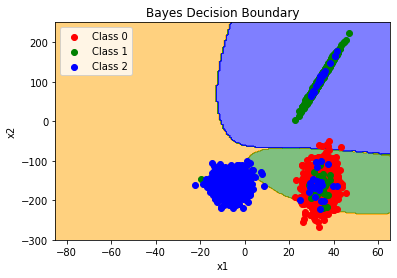

In [ ]:
plt.figure()
ax1 = plt.axes()
plot_out = np.array(plot_out).reshape(len(X1),len(X2))
plt.contourf(X_1,X_2,plot_out,alpha=0.5, cmap = ListedColormap(('orange', 'green', "blue")))

ax1.scatter(x0,y0,marker = 'o',c='r',label ='Class 0')
ax1.scatter(x1,y1,marker = 'o',c='g',label ='Class 1')
ax1.scatter(x2,y2,marker = 'o',c='b',label ='Class 2')

plt.title('Bayes Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

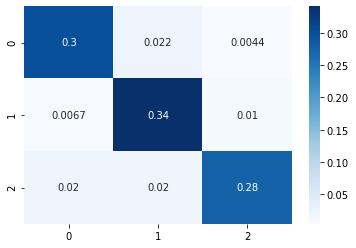

In [ ]:
cm = pd.DataFrame(confusion_matrix(test2['Labels'],output_D2_5_test,normalize='all'),columns=['0','1','2'])
plt.figure()
sns.heatmap(cm,annot=True,cmap='Blues')


In [ ]:
w , v = np.linalg.eig(M2_D2)
print(w,'\n')
print(v.T)

[ 177.41553521 2643.56494355] 

[[-0.99110344  0.13309386]
 [-0.13309386 -0.99110344]]


In [ ]:
print()


NameError: ignored